# HW4 - Jingwen Li

In [54]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Q2

In [55]:
PD = 0.05
ELGD = 0.3
rho = 0.15
EL = PD * ELGD

In [56]:
def F_cLGD(cPD, PD, rho, a):
    if a == 0:
        k = (norm.ppf(PD)-norm.ppf(EL))/(1-rho)**0.5
        return norm.cdf(norm.ppf(cPD) - k)/cPD
    else:
        return ELGD**a * norm.cdf(norm.ppf(cPD)-(norm.ppf(PD)-norm.ppf(EL/ELGD**a))/(1-rho)**0.5) / cPD

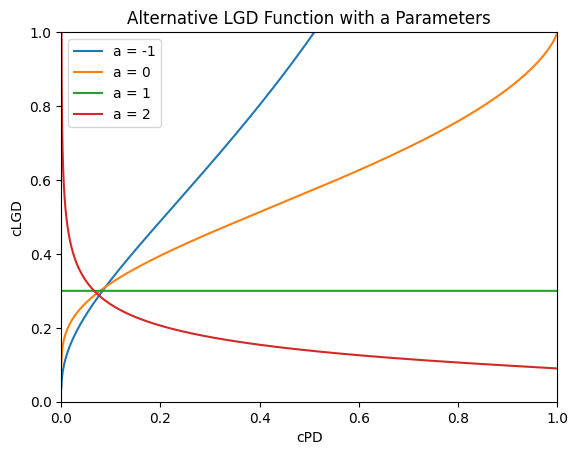

In [57]:
# Define the values for cprob
cprob = np.linspace(0, 1, num=5000, endpoint=True)

# Define the values for a
a_values = [-1, 0, 1, 2]

# Create a figure and axis object
fig, ax = plt.subplots()

# Loop through the different values of a
for a in a_values:
    # Calculate the values of cLGD for each value of cPD
    cLGD = [F_cLGD(cPD, PD, rho, a) for cPD in cprob]
    
    # Plot the values of cLGD against cprob
    ax.plot(cprob, cLGD, label='a = {}'.format(a))

# Add a legend to the plot
ax.legend()

# Set the axis labels and title
ax.set_xlabel('cPD')
ax.set_ylabel('cLGD')
ax.set_title('Alternative LGD Function with a Parameters')

# Set the y-axis limits
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)

# Show the plot
plt.show()


## Q3

In [58]:
def F_cPD(PD, rho, cPD):
    return norm.cdf(((1-rho)**0.5 * norm.ppf(cPD)-norm.ppf(PD))/rho**0.5)

def F_invcLoss(EL, rho, q):
    return norm.cdf((norm.ppf(EL) + rho**0.5 * norm.ppf(q))/(1-rho)**0.5)

def Vasicek_cLGD(PD, rho1, rho2, cPD, EL):
    return F_invcLoss(EL, rho2, q=F_cPD(PD, rho1, cPD))/cPD

In [59]:
PD = 0.02
rho1 = 0.1

In [60]:
EL = 0.01

rho_a = 0.05
rho_b = 0.1
rho_c = 0.15

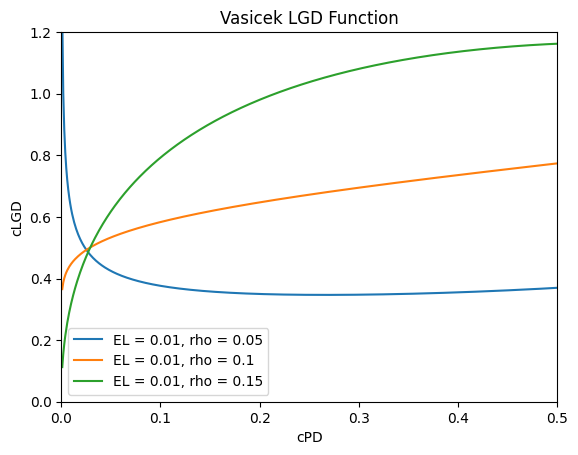

In [61]:
cPD = np.linspace(0, 1, num=1000, endpoint=True)
# Plot lgd vs cPD for the three cases
plt.figure()
plt.plot(cPD, Vasicek_cLGD(PD, rho1, rho_a,cPD, EL), label = 'EL = 0.01, rho = 0.05')
plt.plot(cPD, Vasicek_cLGD(PD, rho1, rho_b,cPD, EL) , label = 'EL = 0.01, rho = 0.1')
plt.plot(cPD, Vasicek_cLGD(PD, rho1, rho_c,cPD, EL) , label = 'EL = 0.01, rho = 0.15')
plt.ylim(0,1.2)
plt.xlim(0,0.5)
plt.legend()
plt.xlabel('cPD')
plt.ylabel('cLGD')
plt.title('Vasicek LGD Function')
plt.show()

Comment:

It's worth noting that the Vasicek LGD function assumes comonotonicity, which means that the LGD must increase as the probability of default increases. This assumption is important because it aligns with the expected behavior of credit losses - as the risk of default increases, the expected loss given default should also increase.

Based on this assumption, the usefulness of the models with different correlation coefficients would still depend on the specific context and purpose for which they are being used. The model with rho = 0.15, which is the most sensitive and positively correlated, may be useful in scenarios where there is a strong positive correlation between credit loss given default (cLGD) and probability of default (cPD), and where comonotonicity is expected or observed. The model with rho = 0.1, which is less sensitive and positively correlated, may still be useful in situations where the correlation between cLGD and cPD is positive but not as strong.

However, the model with rho = 0.05, which is less sensitive and negatively correlated, would not be useful in most credit risk applications because it violates the comonotonicity assumption of the Vasicek LGD function. As mentioned earlier, a negative correlation between cLGD and cPD is counterintuitive and does not align with the expected behavior of credit losses.

In summary, the Vasicek LGD function assumes comonotonicity and the usefulness of the models with different correlation coefficients depends on the specific context and purpose for which they are being used. The models with higher positive correlation coefficients may be appropriate in scenarios where comonotonicity is expected or observed, while the model with a negative correlation coefficient would not be useful due to its violation of the comonotonicity assumption.